In [227]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import scipy as sp #right=True.
from operator import itemgetter, attrgetter
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

In [228]:
def recherche_indice_classe(y,classe):
    #Pour trouver les indices des element de la classe passé en parametre
    return [i for i in range(len(y)) if y[i]==classe]

def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp

def myACP(X,y,classe):
    X=X[recherche_indice_classe(y,classe)] 
    n = X.shape[1]
    m = X.shape[0]
    moy = np.sum(X,0)/m # axe de la matrice selon lequel on somme
    np.reshape(moy,(n,1))
    # données centrées
    XC = X-moy.T
    
    # covariance
    S = XC.T@XC/m

    # calcule des valeurs propres et vecteurs propres
    # vecteurs propres de norme 1 rangés en colonnes

    Valp, Vectp = np.linalg.eig(S)
    # il faut ordonner dans l'ordre des valeurs propres décroissantes
    Valp,Vectp = TriVP(Valp,Vectp)
    # on projette sur les deux premiers axes principaux
    Projection = XC @ Vectp[:,:2]
    
    return Projection,Valp

In [231]:
digit = datasets.load_digits()
y = digit.target

In [232]:
def calculm_variance(classe,nombre_composante):
    #Clacule la variance expliquéé pour un nombre de composante donné
    h=myACP(digit.data,y,classe)[1] 
    return sum(h[:nombre_composante])/(sum(h))*100
        
def visualisation(classe):
    h=myACP(digit.data,y,classe)[1] 
    taux=[]
    index=[]
    for i in range(1,len(h)+1):
        s=calculm_variance(classe,i)
        taux.append(s)
        index.append(i)
        if s>=90:
            break
    plt.title(f'Classe {classe} Nombre de composante pour 90% : {i} composantes')
    plt.plot(index,taux,'-o',)
    plt.show()

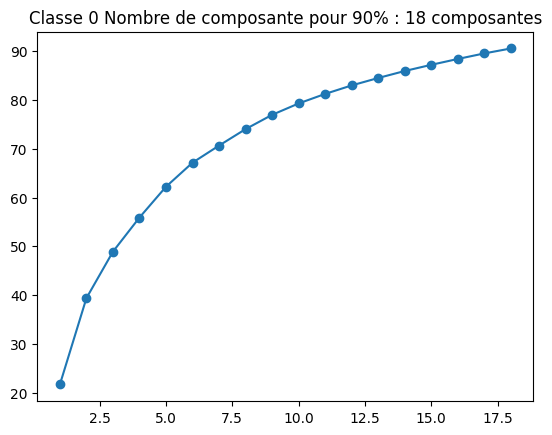

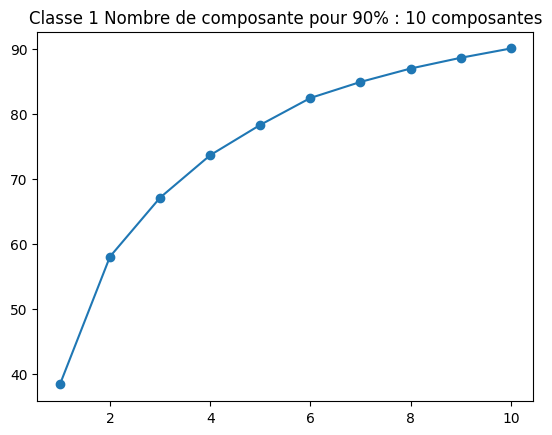

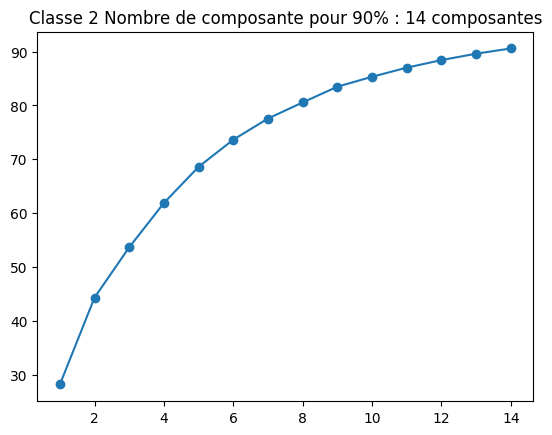

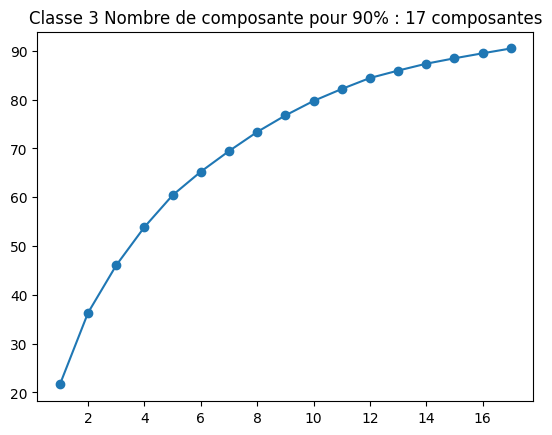

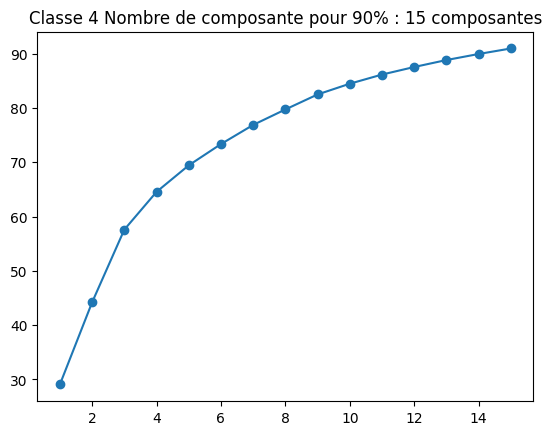

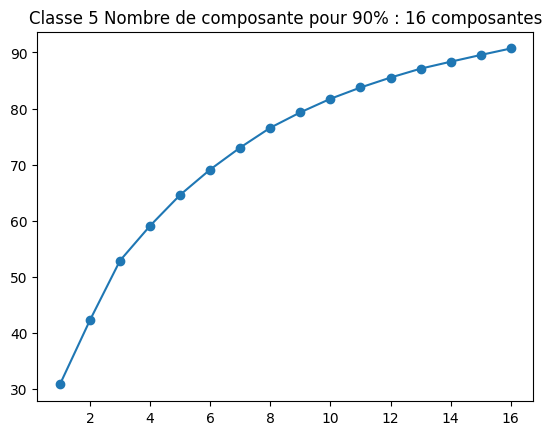

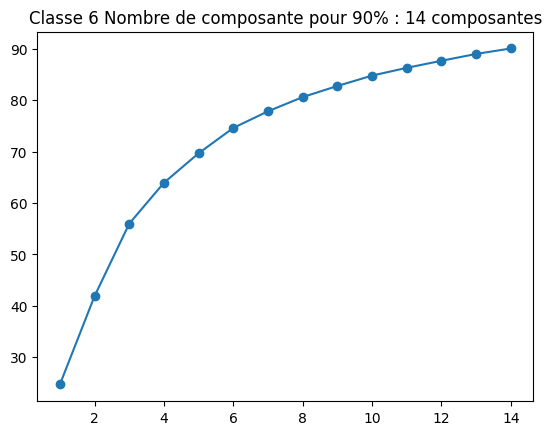

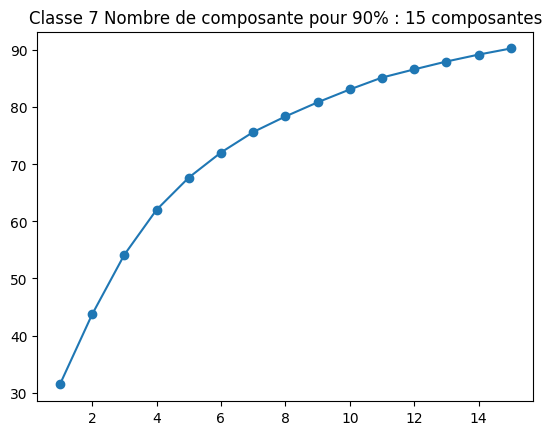

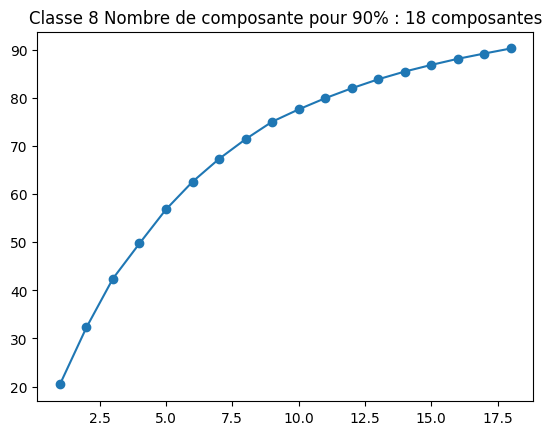

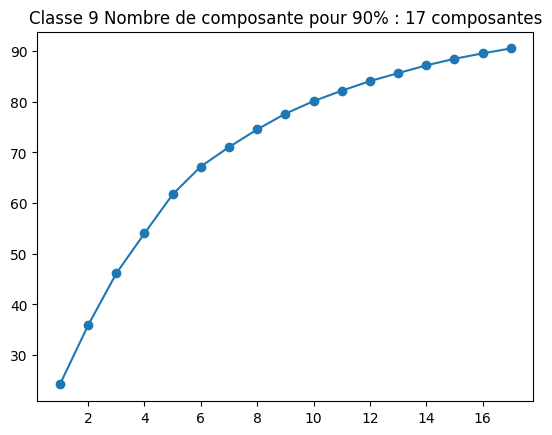

In [233]:
for i in range(0,10): 
   visualisation(i)

# Ordre de classement decroissante
## Classe 0 : 18 Composants
## Classe 8 : 18 Composants
## Classe 9 : 17 Composants
## Classe 3 : 17 Composants
## Classe 5 : 16 Composants
## Classe 4 : 15 Composants
## Classe 7 : 15 Composants
## Classe 2 : 14 Composants
## Classe 6 : 14 Composants
## Classe 1 : 10 Composants

In [234]:
calculm_variance(1,4)

np.float64(73.6496168498443)

In [192]:
def myACP_5compos(X,y,classe):
    X=X[recherche_indice_classe(y,classe)] 
    n = X.shape[1]
    m = X.shape[0]
    moy = np.sum(X,0)/m # axe de la matrice selon lequel on somme
    np.reshape(moy,(n,1))
    # données centrées
    XC = X-moy.T
    
    # covariance
    S = XC.T@XC/m

    # calcule des valeurs propres et vecteurs propres
    # vecteurs propres de norme 1 rangés en colonnes

    Valp, Vectp = np.linalg.eig(S)
    # il faut ordonner dans l'ordre des valeurs propres décroissantes
    Valp,Vectp = TriVP(Valp,Vectp)
    # on projette sur les deux premiers axes principaux
    
    return Vectp[:5]

## Visualiser les 5 composants

In [225]:
def visualiser():
    for classe in range(10):
        print(f'----Classe {classe}')
        plt.imshow(myACP_5compos(digit.data,y,classe))
        plt.show()


----Classe 0


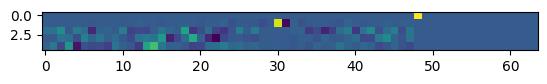

----Classe 1


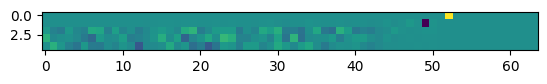

----Classe 2


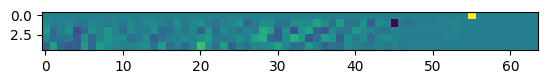

----Classe 3


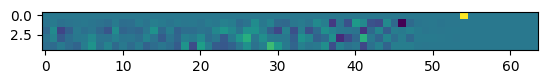

----Classe 4


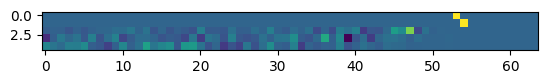

----Classe 5


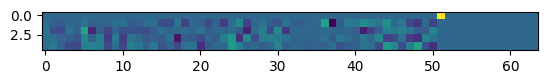

----Classe 6


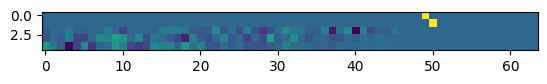

----Classe 7


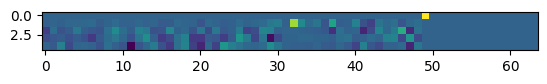

----Classe 8


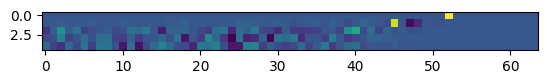

----Classe 9


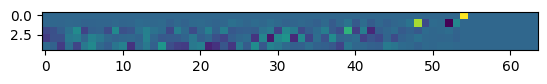

In [235]:
visualiser()

In [236]:
def verif_produit_scal(classe):
    print(f'----Classe {classe}')
    for i in range(5):
            for j in range(i+1,5):
                print(f'Produit Scalaire entre le composant {i} et le composant{j} :')
                print(myACP_5compos(digit.data,y,classe)[i]@myACP_5compos(digit.data,y,classe)[j])


In [237]:
verif_produit_scal(0)

----Classe 0
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
7.684824998577255e-16
Produit Scalaire entre le composant 1 et le composant3 :
-3.9898639947466563e-17
Produit Scalaire entre le composant 1 et le composant4 :
6.500876226223085e-16
Produit Scalaire entre le composant 2 et le composant3 :
5.273559366969494e-16
Produit Scalaire entre le composant 2 et le composant4 :
-1.3114509478384662e-15
Produit Scalaire entre le composant 3 et le composant4 :
-1.1796119636642288e-16


In [238]:
verif_produit_scal(1)

----Classe 1
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
-1.970645868709653e-15
Produit Scalaire entre le composant 1 et le composant3 :
-2.168404344971009e-17
Produit Scalaire entre le composant 1 et le composant4 :
-6.609296443471635e-16
Produit Scalaire entre le composant 2 et le composant3 :
-6.467049118441537e-15
Produit Scalaire entre le composant 2 et le composant4 :
-1.0269562977782698e-15
Produit Scalaire entre le composant 3 et le composant4 :
3.0253577421035516e-15


In [239]:
verif_produit_scal(3)

----Classe 3
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
-2.498001805406602e-16
Produit Scalaire entre le composant 1 et le composant3 :
-4.163336342344337e-17
Produit Scalaire entre le composant 1 et le composant4 :
3.608224830031759e-16
Produit Scalaire entre le composant 2 et le composant3 :
3.3306690738754696e-16
Produit Scalaire entre le composant 2 et le composant4 :
5.793976409762536e-15
Produit Scalaire entre le composant 3 et le composant4 :
-1.887379141862766e-15


In [240]:
verif_produit_scal(4)

----Classe 4
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
0.0
Produit Scalaire entre le composant 1 et le composant3 :
0.0
Produit Scalaire entre le composant 1 et le composant4 :
0.0
Produit Scalaire entre le composant 2 et le composant3 :
-1.0685896612017132e-15
Produit Scalaire entre le composant 2 et le composant4 :
9.020562075079397e-17
Produit Scalaire entre le composant 3 et le composant4 :
-2.095545958979983e-15


In [241]:
verif_produit_scal(5)

----Classe 5
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
-1.2490009027033011e-15
Produit Scalaire entre le composant 1 et le composant3 :
4.315992008230296e-15
Produit Scalaire entre le composant 1 et le composant4 :
-3.559652572704408e-15
Produit Scalaire entre le composant 2 et le composant3 :
1.5404344466674047e-15
Produit Scalaire entre le composant 2 et le composant4 :
1.0547118733938987e-15
Produit Scalaire entre le composant 3 et le composant4 :
-1.1657341758564144e-15


In [242]:
verif_produit_scal(6)

----Classe 6
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
0.0
Produit Scalaire entre le composant 1 et le composant3 :
0.0
Produit Scalaire entre le composant 1 et le composant4 :
0.0
Produit Scalaire entre le composant 2 et le composant3 :
2.518818487118324e-15
Produit Scalaire entre le composant 2 et le composant4 :
-2.192690473634684e-15
Produit Scalaire entre le composant 3 et le composant4 :
1.8596235662471372e-15


In [243]:
verif_produit_scal(7)

----Classe 7
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
-9.922618282587337e-15
Produit Scalaire entre le composant 1 et le composant3 :
-5.659535340374333e-15
Produit Scalaire entre le composant 1 et le composant4 :
1.5543122344752192e-15
Produit Scalaire entre le composant 2 et le composant3 :
-2.858824288409778e-15
Produit Scalaire entre le composant 2 et le composant4 :
2.0816681711721685e-15
Produit Scalaire entre le composant 3 et le composant4 :
-4.496403249731884e-15


In [244]:
verif_produit_scal(8)

----Classe 8
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
-6.248473960468459e-15
Produit Scalaire entre le composant 1 et le composant3 :
2.2169766022983595e-15
Produit Scalaire entre le composant 1 et le composant4 :
-1.2134390714457766e-15
Produit Scalaire entre le composant 2 et le composant3 :
1.5543122344752192e-15
Produit Scalaire entre le composant 2 et le composant4 :
-2.2620794126737565e-15
Produit Scalaire entre le composant 3 et le composant4 :
-2.400857290751901e-15


In [245]:
verif_produit_scal(9)

----Classe 9
Produit Scalaire entre le composant 0 et le composant1 :
0.0
Produit Scalaire entre le composant 0 et le composant2 :
0.0
Produit Scalaire entre le composant 0 et le composant3 :
0.0
Produit Scalaire entre le composant 0 et le composant4 :
0.0
Produit Scalaire entre le composant 1 et le composant2 :
2.643718577388654e-15
Produit Scalaire entre le composant 1 et le composant3 :
3.191891195797325e-16
Produit Scalaire entre le composant 1 et le composant4 :
-6.938893903907228e-16
Produit Scalaire entre le composant 2 et le composant3 :
-2.7755575615628914e-16
Produit Scalaire entre le composant 2 et le composant4 :
1.8110513089197866e-15
Produit Scalaire entre le composant 3 et le composant4 :
-4.3021142204224816e-16
